# Introduction to Scikit-Learn (sklearn)

I'll be trying to learn and implement some of the most useful features of the Scikit-Learn library in this notebook.

What we're going to cover:

An end-to-end Scikit-Learn workflow
1. [Getting the data ready](#section_1)
2. [Choose the right estimator/algorithm for our problems](#section_2)
3. [Fit the model/algorithm and use it to make predictions on our data](#section_3)
4. [Evaluating a model](#section_4)
5. [Improve a model](#section_5)
6. [Save and load a trained model](#section_6)
7. [Putting it all together!](#section_7)


In [2]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1. Getting Data Ready

In [3]:
# get data ready

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# create x (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

### 2. Choosing the right estimator/algorithm for our problems

In [5]:
# choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# tested below. n_estimators=40 came out best
# clf = RandomForestClassifier(n_estimators=40)

# we'll keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# you can ignore the warnings

import sklearn
sklearn.show_versions()


System:
    python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
executable: c:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.26.0
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True



threadpoolctl info:
       filepath: C:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 4
threading_layer: intel

       filepath: C:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


### 3. Fit the model/algorithm to training data

In [7]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

<a id='section_4'></a>

### 4. Evaluating a model

In [10]:
# how well does the model predict?

clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.82      0.97      0.89        34

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 1, 33]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.8688524590163934

### 5. Improve a model

In [15]:
# Try differnt amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

    

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 88.52%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...


Model accuracy on test set: 88.52%

Trying model with 60 estimators...
Model accuracy on test set: 85.25%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 90.16%

Trying model with 90 estimators...
Model accuracy on test set: 88.52%



In [16]:
# it looks like n_estimators=40 is best

### 6. Save and load a trained model

In [17]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

loaded_model.score(x_test, y_test)

0.8852459016393442

<a id='section_1'></a>
## 1. Getting Data Ready

Three main things we have to do:
1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
# IMPORTANT: never test your model on data it was trained on

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

#### Important steps in data handling:
1. Clean data
    - sometimes data is missing or there are outliers
2. Transform data
    - turn non-numerical data into numerical data (feature encoding)
    - feature scaling
3. Reduce data
    - get rid of data that isn't useful or isn't needed


### Transforming data into numbers

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv")



In [24]:
# split into x & y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# training and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### SKLearn Regressor vs Classifier

- **Regressor:**
  - Used for predicting a number (For example, predicting a house price).
  - Deals with continuous outcomes.

- **Classifier:**
  - Used for predicting whether a sample is one thing or another (For example, whether a tumor is malignant or benign).
  - Deals with categorical outcomes.


In [25]:
# build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [26]:
# convert string to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# doors is a categorical feature even though it's a number
# think of it as a category of 3, 4, 5
categorical_features = ["Make", "Colour", "Doors"]

# create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

# transform the columns with strings to numbers
transformed_X = transformer.fit_transform(X)

transformed_X



array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

<img src="./images/one_hot_ex.png"/>


In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [30]:
# let's refit the model

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [32]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# create x and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [35]:
# fill missing values with pandas
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)



In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
# remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [40]:
categorical_features = ["Make", "Colour", "Doors"]

# create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# create an instance of ColumnTransformer

transformer = ColumnTransformer([("one_hot",
                                    one_hot,
                                    categorical_features)],
                                    remainder="passthrough")

# transform the columns with strings to numbers
transformed_X = transformer.fit_transform(car_sales_missing)

transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [41]:
# Remove missing values with Scikit-Learn
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [42]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
# split into x & y

X  = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]  

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


# fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
filled_X_train      


array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [45]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                        columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0


In [46]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                    one_hot,
                                    categorical_features)],
                                    remainder="passthrough")

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
print(transformed_X_train)


  (0, 3)	1.0
  (0, 5)	1.0
  (0, 12)	1.0
  (0, 14)	86696.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 12)	1.0
  (1, 14)	20714.0
  (2, 3)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 14)	134415.0
  (3, 3)	1.0
  (3, 7)	1.0
  (3, 12)	1.0
  (3, 14)	130710.2301369863
  (4, 1)	1.0
  (4, 9)	1.0
  (4, 12)	1.0
  (4, 14)	145850.0
  (5, 3)	1.0
  (5, 9)	1.0
  (5, 12)	1.0
  (5, 14)	117504.0
  (6, 0)	1.0
  :	:
  (753, 14)	130710.2301369863
  (754, 1)	1.0
  (754, 9)	1.0
  (754, 12)	1.0
  (754, 14)	108206.0
  (755, 2)	1.0
  (755, 6)	1.0
  (755, 12)	1.0
  (755, 14)	111256.0
  (756, 1)	1.0
  (756, 9)	1.0
  (756, 12)	1.0
  (756, 14)	246079.0
  (757, 1)	1.0
  (757, 6)	1.0
  (757, 12)	1.0
  (757, 14)	224900.0
  (758, 4)	1.0
  (758, 9)	1.0
  (758, 11)	1.0
  (758, 14)	19482.0
  (759, 1)	1.0
  (759, 6)	1.0
  (759, 12)	1.0
  (759, 14)	199833.0


In [48]:
# now we've got our data as numbers and filled (no missing values)
# let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_train, y_train)

0.8824429525790444

<a id='section_2'></a>
## 2. Choosing the right estimator/algorithm for our problems

Some things to keep in mind:

* SKLearn refers to machine learning models and algorithms as **estimators**.
* Classification - predicting whether a sample is one thing or another.
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
* Regression - predicting a number.

<img src="./images/sklearn-ml-map.png"/>

### 2.1 Picking a machine learning model for a regression problem
Working with California housing dataset.

In [49]:
# get California housing data
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [50]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["Target"] = housing["target"]

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
# Import Algorithm/Estimator class (Lets experiment!)
from sklearn.linear_model import Ridge

np.random.seed(42)

# create data
X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]  # median house value in $100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate model and fit (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

# this returns the coefficient of determination (R^2) of the prediction.

0.5758549611440128

In [53]:
# repeat with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


# Instantiate model and fit (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.8051230593157366

In [54]:
## 2.2 Choosing an estimator for a classification problem
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("data/heart-disease.csv")

# create X (features matrix)
X = heart_disease.drop("target", axis=1)

# create y (labels)

y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate model and fit (on the training set)
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier (use the patterns it has learned)
clf.score(X_test, y_test)

0.8360655737704918

Tidbit:
1. Structured data - data which has labels (also known as supervised learning).
2. Unstructured data - data which has no labels (also known as unsupervised learning).

<a id='section_3'></a>
## 3. Fit the model/algorithm to training data

### 3.1 Fitting a model to data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [55]:
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("data/heart-disease.csv")

# create X (features matrix)
X = heart_disease.drop("target", axis=1)

# create y (labels)

y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate model and fit (on the training set)
clf = RandomForestClassifier()


# fit the model (find the patterns in the data) (training patterns)
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier (use the patterns it has learned)
clf.score(X_test, y_test)

0.8688524590163934

### 3.2 Making predictions using a machine learning model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [56]:
# use a trained model to make predictions

clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [57]:
# compare predictions to truth labels to evaluate the model

# 3 different ways to evaluate Scikit-Learn models/estimators

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [58]:
clf.score(X_test, y_test)

0.8688524590163934

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

## make predictions with `predict_proba()`
predict_proba() returns the probability of a classification label

In [60]:
clf.predict_proba(X_test[:5])



array([[0.5 , 0.5 ],
       [0.34, 0.66],
       [0.95, 0.05],
       [0.55, 0.45],
       [0.6 , 0.4 ]])

In [61]:
# lets predict on the same data
clf.predict(X_test[:5])


array([0, 1, 0, 0, 0], dtype=int64)

In [62]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models.

In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate model and fit (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
y_preds = model.predict(X_test)


In [64]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

<a id='section_4'></a>
## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:
1. Estimator `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions.

read more about [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

### 4.1 Evaluating a model with the `score()` method

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate model and fit (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)



RandomForestRegressor()

In [66]:
clf.score(X_test, y_test)

0.9836065573770492

### 4.2 Evaluating a model using the `scoring` parameter

cross-validation - splitting data into multiple parts and training/evaluating a model on each part.

<img src="./images/sklearn-cross-validation.png"/>

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)




RandomForestClassifier()

In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
# cross validation
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [70]:
np.random.seed(42)

# single training and test split score

clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold cross-validation score

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Scoring parameter set to none by default.
- if set to none, the default scoring parameter of the estimator will be used.

### 4.3.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [71]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

np.mean(cross_val_score)

0.8248087431693989

In [72]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


Area under ROC curve - [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

- **AUC/ROC**: Area under the receiver operating characteristic curve

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [73]:
from sklearn.metrics import roc_curve


# make predictions with probabilities
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [74]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [75]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

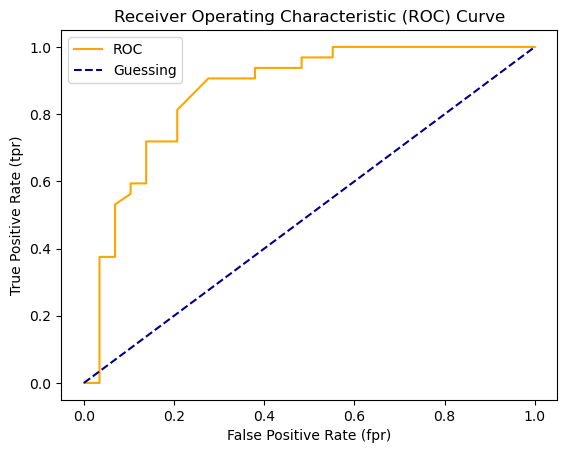

In [76]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt


def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """

    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue",
             linestyle="--", label="Guessing")

    # customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

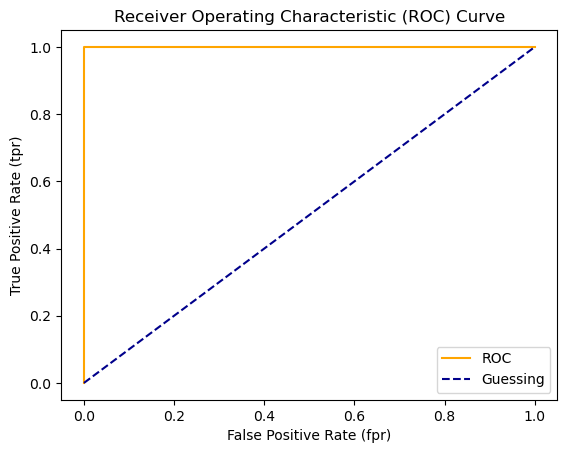

In [78]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

** Confusion matrix ** - a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [79]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [80]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


### Creating a confusion matrix using Scikit-Learn

sklearn 1.0+

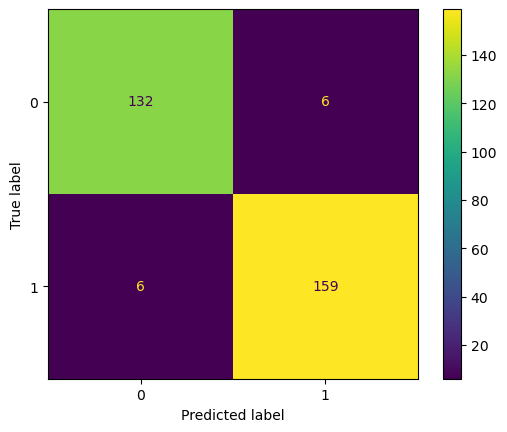

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)

In [82]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [83]:
# Where precision and recall become valuable

"""
Accuracy can be misleading when you have a class imbalance.
Here is an example of a classifier that achieves 99% accuracy yet is basically useless:
"""


disease_true = np.zeros(10000)
disease_true[0] = 1  # only one positive case

disease_preds = np.zeros(10000)  # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

c:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcruz\ztm_ml_projects\sklearn-intro\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis=1)
y = housing_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
model.score(X_test, y_test)

0.8065734772187598

In [89]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
# r2 score (coefficient of determination) test
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())



In [91]:
r2_score(y_test, y_test_mean)

0.0

In [92]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds) 
mae


0.32659871732073664

In [93]:
# MAE Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [95]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [96]:
df["differences"].abs().mean()

0.32659871732073664